# Coding Block 1 - Random Forests (and XGBoost)

### Load the packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Read the dataset 
You can also compare processed and non-processed data.

In [2]:
df = pd.read_csv("../data/diabetes.csv")

### Split the data and train a Random Forest model

In [6]:

# Assuming the last column is the target variable
X = df.drop(columns="Outcome")  # Features
y = df["Outcome"]   # Target

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
def get_rf_model(x_train, y_train):
    rf_model = RandomForestClassifier()
    rf_model.fit(X_train, y_train)
    return rf_model

rf_models = []
for i in range(20):
    rf_models.append(get_rf_model(X_train, y_train))

# Make predictions on the test set
for rf_model in rf_models:
    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.74
Accuracy: 0.71
Accuracy: 0.75
Accuracy: 0.73
Accuracy: 0.75
Accuracy: 0.73
Accuracy: 0.74
Accuracy: 0.73
Accuracy: 0.75
Accuracy: 0.73
Accuracy: 0.73
Accuracy: 0.75
Accuracy: 0.74
Accuracy: 0.72
Accuracy: 0.75
Accuracy: 0.73
Accuracy: 0.75
Accuracy: 0.73
Accuracy: 0.73
Accuracy: 0.75


### Evaluate the prediction models using a classification report

### Print the feature importances of the random forest

In [4]:
# Get feature importance
importance = rf_model_1.feature_importances_

# Create a DataFrame for better visualization (optional)
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Print the feature importance
print(feature_importance_df)

                    Feature  Importance
1                   Glucose    0.258864
5                       BMI    0.169984
7                       Age    0.140931
6  DiabetesPedigreeFunction    0.123768
2             BloodPressure    0.088134
0               Pregnancies    0.076551
4                   Insulin    0.076122
3             SkinThickness    0.065646


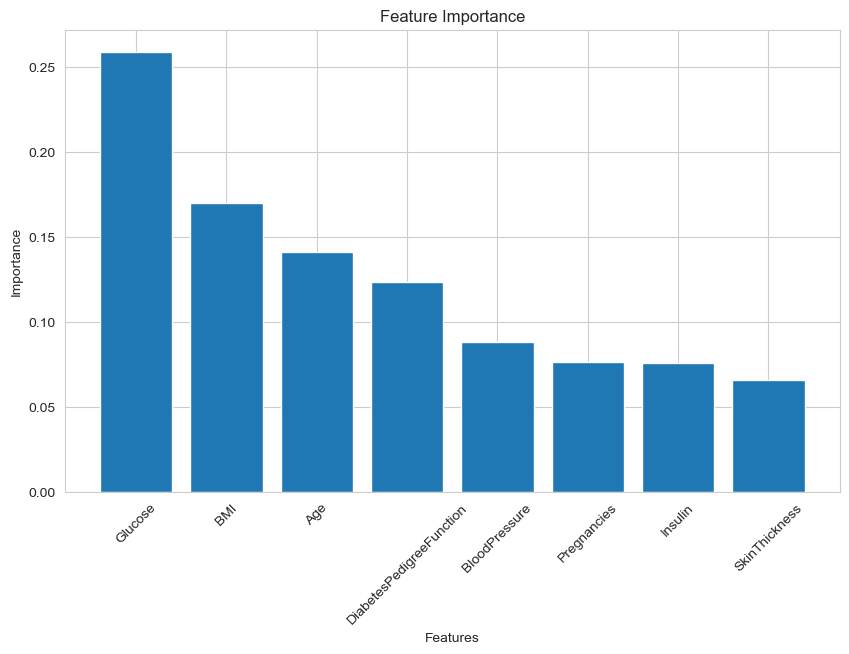

In [5]:
import matplotlib.pyplot as plt

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()

### Extra: Also train a XGBoost model and compare the results.